In [117]:
#Necessary so that each cell can produce multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 3.3.2: Finding the Distance Between Two Points
***
- learn how to use Python to determine the Euclidean __distance between two points__ as a NumPy array
<p align="center">
  <img width="474" height="274" src="euclid_dist_drawing.1.jpg">
</p>

Here we have two points, and want to find the length of the distance between them (a '?' on the diagram)

We can draw lines horizontally and vertically to form a triangle, whose side lenghts we know:
<p align="center">
  <img width="474" height="274" src="euclid_dist_drawing.2.jpg">
</p>

The side lengths are $|x_2-x_1|$ and $|y_2-y_1|$
If we now say that the length of the longest side is $d$, then we can calculate the distance using the pythagorean theorem:
$d^2 = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

Now let's implement these ideas in code. Since we're dealing with vectors, we'll use NumPy for this
 - From a mathematical perspective, it will be easier to use column vectors, but row vectors are easier to use in NumPy



In [118]:
import numpy as np
p1 = np.array([1,1])
p2 = np.array([4,4])
p2-p1

array([3, 3])

Now, we want to take this difference, and square it using the np.power() function


In [119]:
np.power(p2-p1,2)

array([9, 9])

We have the square differences between the x and y coordinates of these two points
Now we sum over these two terms, and then square root

In [120]:
np.sqrt(np.sum(np.power(p2-p1,2)))

4.242640687119285

Now let's turn this code into a function

In [121]:
import numpy as np
def distance(p1, p2):
    '''Find the distance between points p1 and p2'''
    return np.sqrt(np.sum(np.power(p2-p1,2)))

p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1,p2)
#gives 4.242640687119285

4.242640687119285

This gives us the same answer as before, so the function works!

## 3.3.3: Finding the Majority Vote
***
- learn how to find the __most common vote__ in an array or a sequence of votes
- __Compare__ two different methods for finding the most common vote

NOTE: Note that while this method is commonly called "majority vote," what is actually determined is the plurality vote, because the most common vote does not need to represent a majority of votes. We have used the standard naming convention of majority vote here.


- For building our kNN classifier, we need to be able to calculate a majority vote
    - Given an array/sequence of fobes (ex. 1,2,3), we need to determine how many times each occurs then find the most common vote
    - Ex: 1,1,2,2,2,3: majority vote is 2
    - We need to count the # of times each vote occurs, but will not be returning the count (we'll return the observation corresponding to the highest count)

Let's build a function called majority_vote (which will be similar to the count_words function in the previous case study)

Here's the count_words function that we previously defined:

In [122]:
def count_words(text):
    '''
    Counts the number of times each word occurs in the text (str). Returns dictionary where keys are
    unique words and values are word counts. Skip punctuation. 
    '''
    
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "!", "?"]
    for ch in skips:
        text = text.replace(ch, "")

    word_counts= {}
    for word in text.split(' '):
        if word in word_counts:
            word_counts[word] += 1
        else: 
            word_counts[word] = 1
    return word_counts

Let's define our new function by editing the old one:

In [123]:
def majority_vote(votes):
    '''
    xxx
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else: 
            vote_counts[vote] = 1
    return vote_counts

Now let's try it out with some data

In [124]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
vote_counts = majority_vote(votes)
vote_counts

{1: 3, 2: 3, 3: 6}

In this dictionary, the keys are the different votes that occurred, and the values are the number of occurences of the vote.

Looking at this dictionary, we can tell that 3 occurred the most times, but how can we get python to do this?
- Given a dictionary where the values are counts, how can we get Python to return the key that corresponds to the largest value?

Let's start by finding the maximum counts.


In [125]:
#the following code returns the maximum key
max(vote_counts) 
# or 
max(vote_counts.keys())

#We want the maximum VALUE
max_counts = max(vote_counts.values())
max_counts

3

3

6

Let's add this code to our editor for future use

In [126]:
def majority_vote(votes):
    '''
    xxx
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else: 
            vote_counts[vote] = 1
    return vote_counts

votes = [1,2,3,1,2,3,1,2,3,3,3,3]
vote_counts = majority_vote(votes)

max_counts = max(vote_counts.values())

Now we can loop over all entries in the dictionary, and find which entry/entries corresponds to the maximum count using the items method of dictionaries

In [127]:
for vote, count in vote_counts.items():
    print(vote, count)

1 3
2 3
3 6


The above code loops over the dictionary and for each entry prints the key and value associated to it. This is a good starting point for our code.

What we want to know now is if the current entry we're looking at has the maximum number of votes

In [128]:
#Use an empty list 'winners' for keeping track of the keys that correspond to the highest values
winners = []
max_count = max(vote_counts.values())

for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote)
winners

[3]

If we have a tie, we can just pick one of the winners at random, since there's no difference. Let's modify the code accordingly, and also turn it into a function:


In [129]:
import random

def majority_vote(votes):
    '''
    Return the most common element in votes
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else: 
            vote_counts[vote] = 1

    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)



Let's try our function out on the previous example dataset

In [130]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
winner
winner = majority_vote(votes)
winner
winner = majority_vote(votes)
winner

2

3

3

Most commonly ocurring element in a sequence is the __mode__
Finding the mode is a common statistical operation, so we could use a shorter method (using scipy.stats.mstats.mode())



In [131]:
import scipy.stats as ss
def majority_vote_short(votes):
    '''
    Return the most common element in votes
    '''
    mode, count = ss.mstats.mode(votes)
    return mode

In [132]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote_short(votes)
winner
winner = majority_vote_short(votes)
winner
winner = majority_vote_short(votes)
winner
winner = majority_vote_short(votes)
winner

array([2.])

array([2.])

array([2.])

array([2.])

This always returns 2, as specified in the documentation of the function. We'll be sticking with our own code because we want it to pick randomly given a tie. 

## 3.3.4: Finding Nearest Neighbors
***
- Learn how to __find nearest neighbors__ of an observation
- Use the nearest neighbors to __predict the class__ of an observation

Pseudocode:

In [133]:
# loop over all points
    # compute the distance between point p and every other point
# sort distances and return those k points that are nearest to point p


Test Dataset

(0.5, 3.5, 0.5, 3.5)

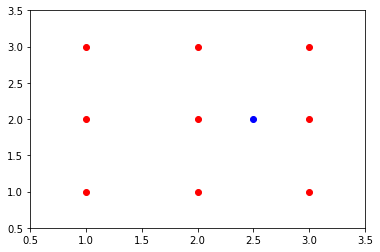

In [134]:
import numpy as np
#note, np.array expects one list as input, we have to put these in another list
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

#let's visualize the data to better undestand it
import matplotlib.pyplot as plt
#the x is all of the rows in column 0, and the y is all of the rows of column 1
plt.plot(points[:,0], points[:,1], 'ro')
#plot point p
plt.plot(p[0], p[1], 'bo')
plt.axis([0.5, 3.5, 0.5, 3.5])


Now let's work with the function

In [135]:
# first create an empty array called distances to hold all of our distances. It will have the same number of 
# elements as there are rows in our points array
distances = np.zeros(points.shape[0])

# next loop over all of the points we have
for i in range(len(distances)):
    #calculate distance between our point and each of the points in the points array
    distances[i] = distance(p, points[i])


The closest points the blue point are (2,2) and (3,2) which correspond to columns 4 and 7 in the points array. Let's check this

In [136]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

distances

points[4]
#this returns array([2, 2]) which matches
points[7]
#this returns array([3, 2]) which matches

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

array([2, 2])

array([3, 2])

We could sort the distances array to give us shorter distances, but what we'd really like to get is an index vector that would sort the array. 

If we had that, we could take the first K elements of that array, and know that the corresponding points are the k closest points to p.

this function exists as np.argsort()
- it returns the indices that would sort the given array

Explore it interactively first:



In [137]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [138]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [139]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

Now the distances have been sorted.

If we wanted to take the two nearest elements, we'd just pick the first 2 indices of the end vector

In [140]:
distances[ind[0:2]]

array([0.5, 0.5])

Let's turn this into a function

In [141]:
def find_nearest_neighbors(p, points, k = 5):
    '''Find the k nearest neighbors of point p and return their indices. Default k is 5.'''
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[0:k] #or just ind[:k]

ind = find_nearest_neighbors(p, points, 2)
print(points[ind])
#Here, python is returning to us the coordinates of the two closest points to the fixed point p


[[2 2]
 [3 2]]


Let's try rerunning this and changing the value of k


In [142]:
ind = find_nearest_neighbors(p, points, 3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


Now let's write a function to predict the class of our new point p

In [143]:
def knn_predict(p, points, outcomes, k=5):
    #find k nearest neighbors
    ind = find_nearest_neighbors(p, points, k)
    #predict the class/category of p based on majority vote
    return majority_vote(outcomes[ind])

In [144]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)

1

In this case, what knn_predict() is doing is the following:
- we're providing a new point (2.5, 2.7)
- we're asking Python to classify this point (we have 2 classes: 0 and 1)
- this predicts that a point given (2.5, 2.7) would have class 1

Let's do this again, and change the coordinates

In [145]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([1.0,2.7]), points, outcomes, k=2)

0

Based on this code, we could try out a number of different points, and see where they'd be classified as 0s and where they'd be classified as 1s, but first let's generate some more interesting synthetic data

## 3.3.5: Generating Synthetic Data
***
- Learn how to __generate synthetic data__

We're going to write a function that generates two end datapoints
- first end point is from class 0
- second end point is from class 1

'synthetic' b/c generated with help from a computer

we'll generate predictors from 2 bivariate (2 variables) normal distributions:
- first gives rise to observations belonging to class 0
- second gives rise to observations belonging to class 1

we'll generate it using the ipstats module


In [146]:
import scipy.stats as ss
#for the first observations
ss.norm(0,1).rvs((5,2))
#for the second observations
ss.norm(1,1).rvs((5,2))

array([[-1.12587314,  1.75266798],
       [-1.30108319, -0.01447572],
       [ 0.43066793, -0.77504458],
       [ 0.75560603, -0.48207095],
       [ 0.04222753,  0.15009999]])

array([[ 0.7403168 ,  0.25250825],
       [ 1.19016895,  1.05053204],
       [ 0.5884048 ,  0.64788311],
       [ 2.21396769,  0.11143419],
       [-0.08612958,  0.93177482]])

Now we want to concatenate the two arrays so that we have a single array with 10 rows and 2 columns

In [147]:
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))), axis = 0)

array([[-0.03337984, -0.04748942],
       [ 0.24774636, -0.1577306 ],
       [-0.15450445,  1.05837493],
       [ 0.52942436,  0.78230282],
       [ 1.23057175, -1.0021988 ],
       [ 2.31360315,  0.33879979],
       [ 0.67748101, -0.16882728],
       [ 1.19891626,  1.14871172],
       [-0.51541399,  2.13039393],
       [ 1.79005104, -0.4162527 ]])

To turn this into a function, we want to be able to specify the number of rows in our synthetic data set

In [148]:
#test it with n = 5
n=5
np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis = 0)
#the first n outcomes are classified 0 the second n outcomes are classified 1
np.concatenate((np.repeat(0,n),np.repeat(1,n)))



array([[ 1.42421258,  1.64139306],
       [-2.48578155, -1.69410319],
       [ 0.09990188,  0.87816959],
       [ 0.27405726, -0.1137999 ],
       [ 1.14015799,  0.39121744],
       [ 2.04090302, -0.12862473],
       [-1.27295747,  0.74500742],
       [ 1.14159085, -0.23467506],
       [ 0.46472919,  1.28563694],
       [ 3.006098  ,  1.38134298]])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Now we're ready to write our function

In [149]:
def generate_synth_data(n = 50):
    '''Create two sets of points from bivariate normal distributions'''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

Now let's try out our function on a sample of n=20, and try plotting our data

In [150]:
n = 20
generate_synth_data(n)

(array([[-0.80440136,  0.3928138 ],
        [ 0.59109757, -1.63567073],
        [ 1.14652758,  1.46252359],
        [ 1.78371914, -1.42819762],
        [ 0.13854304,  0.11299011],
        [ 0.19874218,  0.66299938],
        [-1.03225712, -0.40053891],
        [-0.15890106, -1.51405418],
        [-0.8911813 ,  0.69656638],
        [ 1.15144574,  0.33853533],
        [-0.39671433,  1.2740008 ],
        [ 0.1889965 , -0.18679845],
        [-0.60898232,  1.38558832],
        [-0.0370987 ,  0.42975417],
        [ 0.85957824, -1.01028215],
        [ 2.50133341, -1.09686797],
        [ 1.40600835,  0.28363295],
        [ 0.2283338 , -0.36283044],
        [ 0.13263609,  1.23001114],
        [ 0.76464982, -0.46308005],
        [ 0.99852412,  0.18286887],
        [ 1.03584038, -0.15828844],
        [ 2.50096468,  1.84005561],
        [ 0.869719  ,  1.66623809],
        [ 1.96511662,  1.98527345],
        [-0.88267675,  0.50728245],
        [ 1.09277473, -0.14859589],
        [ 2.9376005 ,  1.701

<Figure size 432x288 with 0 Axes>

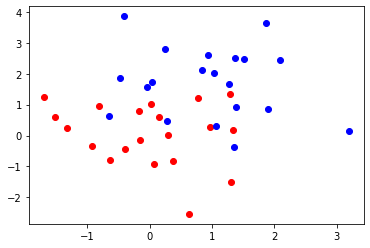

In [151]:
n = 20
(points, outcomes) = generate_synth_data(n)
plt.figure()
plt.plot(points[:n,0], points[:n,1], 'ro')
plt.plot(points[n:,0], points[n:,1], 'bo')
plt.savefig('bivariatedata.pdf')

## 3.3.6: Making a Prediction Grid
***
- Learn how to make a __prediction grid__
- Learn how to use ```enumerate```
- Learn how to use NumPy ```MeshGrid```

Writing a function called ```make_prediction_grid()``` that takes in a number of different arguments

In [152]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    '''Classify each point on the prediciton grid'''
    # limits is a tuple input
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)

    # generate our classifier's prediction for every point on the meshgrid
    # datatype is integer b/c class label is either 0 or 1
    prediction_grid = np.zeros(xx.shape, dtype = int)

    # loop over all x values, all y values asking our knn predict function to predict the class label (0/1) for 
    # each point, then capture in the prediction_grid array

    #loop over xs first:
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            #predict the outcome
            # NOTE: here the assignment is [j,i] rather than the other way around b/c j = y-values, and when we 
            # specify an index using square brackets, the first value is the ROW of the array
            # y values are the rows of the array, and x values are the columns
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)

    return (xx, yy, prediction_grid)

## 3.3.7: Plotting the Prediction Grid
***
- Learn about how to plot the __prediction grid__
- Learn about the __bias-variance tradeoff__ 

To be able to plot the prediction grid, we need one more function: ```plot_prediction_grid``` which is given on the course site [here](https://courses.edx.org/assets/courseware/v1/1767f4a23fabb41320280a989988a4c8/asset-v1:HarvardX+PH526x+1T2020+type@asset+block/plot_prediction_grid.py)



In [159]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

#My function with adjusted colormaps
# def plot_prediction_grid (xx, yy, prediction_grid, filename):
#     """ Plot KNN predictions for every point on the grid."""
#     from matplotlib.colors import ListedColormap
#     background_colormap = ListedColormap (["mediumorchid","lawngreen", "aquamarine"])
#     observation_colormap = ListedColormap (["purple","green","blue"])
#     plt.figure(figsize =(10,10))
#     plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
#     plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
#     plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
#     plt.xticks(()); plt.yticks(())
#     plt.xlim (np.min(xx), np.max(xx))
#     plt.ylim (np.min(yy), np.max(yy))
#     plt.savefig(filename)

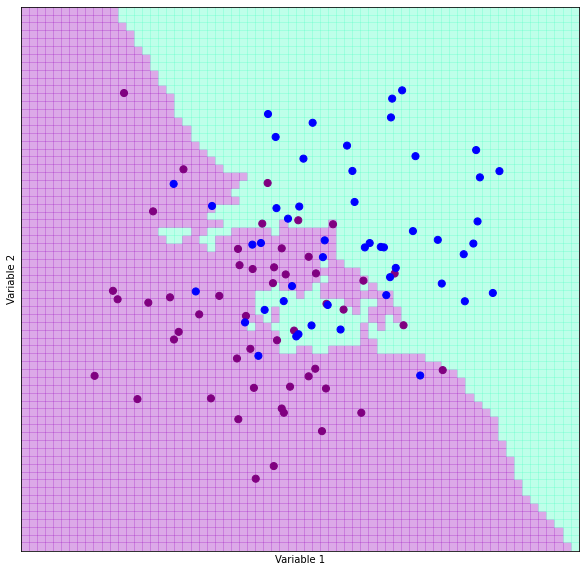

In [154]:
(predictors, outcomes) = generate_synth_data()
k = 5; filename = 'knn_synth_5.pdf'; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)



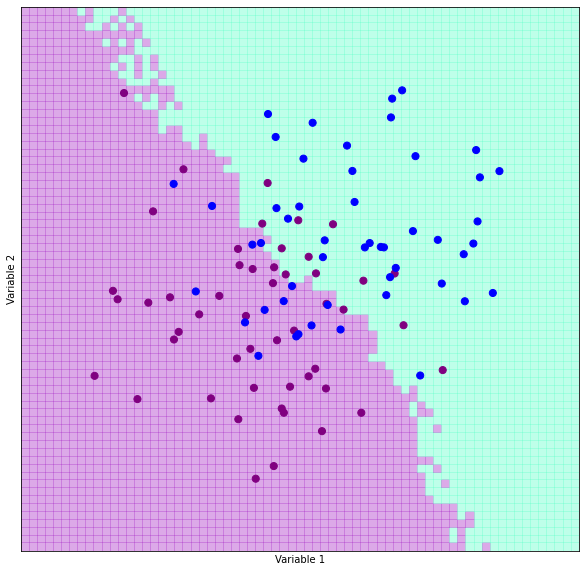

In [155]:
k = 50; filename = 'knn_synth_50.pdf'; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

Looking at these plots, we can see that k=50 has a smoother decision boundary. k = 5 has a more complicated decision boundary. It may seem that you can find a value of k that maximizes the accuracy of the predictions, but that's short sighted.

What you really care about isn't how well your method performs on the training data set, but rather on future datasets you haven't yet seen. Using a value for k that is too large or small is not optimal (bias-variance tradeoff). Some intermediate valuue of k would better. k=5 IS a reasonable choice

## 3.3.8: Applying the kNN Method
***
- learn how to __apply the homemade kNN classifier__ to a real dataset
- __compare__ the performance of the homemade kNN classifier to the performance of the kNN classifier from the ```scikit-learn``` module

In [176]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [156]:
from sklearn import datasets
iris = datasets.load_iris()
predictors = iris.data[:,0:2]
outcomes = iris.target

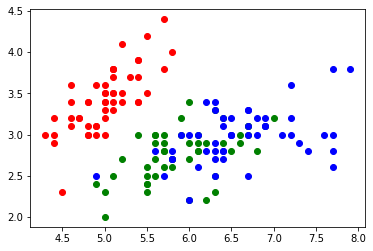

In [157]:
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], 'ro')
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], 'go')
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], 'bo')

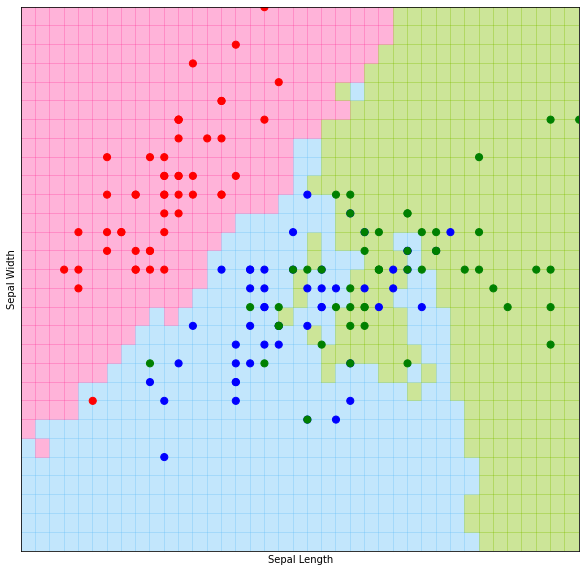

In [179]:
k = 5; filename = 'irisgrid.pdf'; limits = (4,8,1.5,4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width');

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

KNeighborsClassifier()

In [165]:
sk_predictions.shape

(150,)

In [171]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, k) for p in predictors])
my_predictions.shape

(150,)

In [173]:
# how often do the scikit predictions match our predictons
print(np.mean(sk_predictions == my_predictions)*100)



96.0


In [175]:
# how often do my_predictions and scikit predictions match observed data?
print(np.mean(sk_predictions == outcomes)*100)
print(np.mean(my_predictions == outcomes)*100)

83.33333333333334
84.66666666666667
